In [ ]:
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1

(a)試簡述何謂維度的詛咒？試列舉一案例說明。

隨著需要估計的參數增多，所需的樣本會呈現指數型增長。  
舉例：

(b)避免維度詛咒的方法有哪些？

去除模型中不重要的特徵；或將資料進行轉換，縮減其維度，例如：PCA。

(c)試找一個開放數據(e.g. Kaggle 開放數據或第一次作業紅酒數據集)並選一種方法(e.g. 
線性迴歸或決策樹)，用模擬方法固定樣本數但逐步增加變數個數，試著重新繪製圖3.12，
呈現維度與預測(或分類)績效間的關係。(提示：模擬方法可思考如下：(1)先做線性迴歸；
(2)重要變數依 p-value 排序；(3)將重要的變數一個個依序放入迴歸並計算 adjusted-R2 作
為預測準確度

In [ ]:
address="/content/drive/My Drive/colab/MDS_Assignment2_2022/"

In [ ]:
df=pd.read_csv("/content/drive/My Drive/colab/MDS_Assignment2_2022/winequality-red.csv") 
#df=pd.read_csv(address+"MDS_Assignment1_furnace.csv") 
#df = pd.read_excel('/content/drive/My Drive/folder_name/file_name.xlsx')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = df[list(df.columns)[0:-1]]
X=sm.add_constant(X)
y = df[list(df.columns)[-1]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          1.79e-145
Time:                        10:22:23   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
s=[]
p=[]
for i in range(len(model.pvalues)):
    if (i==0):
        s.append("const")
        p.append(model.pvalues[i])
    else:
        s.append(df.columns[i-1])
        p.append(model.pvalues[i])
rank={
    "variable":s,
    "p-value":p
}
rank=pd.DataFrame(rank)
rank=rank.sort_values(["p-value"],ascending=True)
para=rank.sort_values(["p-value"],ascending=True).variable.to_list()
para.remove("const")
print(rank)
print(para)

                variable       p-value
11               alcohol  1.123029e-24
2       volatile acidity  9.872361e-19
10             sulphates  2.127228e-15
7   total sulfur dioxide  8.004610e-06
5              chlorides  8.373953e-06
9                     pH  3.100189e-02
6    free sulfur dioxide  4.474495e-02
3            citric acid  2.149942e-01
4         residual sugar  2.764960e-01
0                  const  3.001921e-01
1          fixed acidity  3.356528e-01
8                density  4.086079e-01
['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'pH', 'free sulfur dioxide', 'citric acid', 'residual sugar', 'fixed acidity', 'density']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


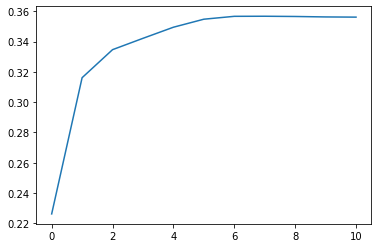

In [ ]:
a=[]
for i in range(1,len(para)+1):
    X = df[para[0:i]]
    X=sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
   # print(model.rsquared_adj)
    a.append(model.rsquared_adj)
plt.plot([i for i in range(0,len(a))],a)    

In [ ]:
X = df[para[0:3]]
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.03e-102
Time:                        20:34:28   Log-Likelihood:                -1688.4
No. Observations:                1599   AIC:                             3385.
Df Residuals:                    1595   BIC:                             3406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2136     12.236      0.916      0.360     -12.787      35.214
citric acid     0.7687      0.103      7.466      0.000       0.567       0.971
alcohol         0.3372      0.020     16.707      0.000       0.298       0.377
density        -9.3309     12.166     -0.767      0.443     -33.194      14.533
==============================================================================
Omnibus:                       31.030   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.978
Skew:                          -0.165   Prob(JB):                     1.40e-11
Kurtosis:                       3.801   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
a

[0.05065042914927853,
 0.2564641454080665,
 0.2562722550879498,
 0.25588663980247583,
 0.2829065434965041,
 0.29906028993475564,
 0.29878881434876314,
 0.31837980391672915,
 0.34974583258371317,
 0.35614886907192267]

## 2

(a)試找一個開放數據(e.g. Kaggle 開放數據)，您會用什麼方法來確認資料品質的好壞？試操作一次並說明其細節。

資料：紅酒數據集，說明：若資料品質佳，則數據集內的各種酸性物質(sulphates,citric acid)，應和PH呈負相關。

In [ ]:
df=pd.read_csv("/content/drive/My Drive/colab/MDS_Assignment2_2022/winequality-red.csv") 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = df["sulphates"]
X=sm.add_constant(X)
y=df["pH"]
model = sm.OLS(y, X).fit()
model.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const        3.428992
sulphates   -0.179106
dtype: float64

In [ ]:
X = df["citric acid"]
X=sm.add_constant(X)
y=df["pH"]
model = sm.OLS(y, X).fit()
model.params

const          3.427491
citric acid   -0.429477
dtype: float64

(b)公司或您是否有現存方法來進行資料品質的確認？如果有(或沒有)，試依您的角度說明(或建議)確認資料品質的標準作業流程(i.e. SOP)。

先對做實驗結果做假設。進行重複實驗，若結果差異過大，亂跳，代表資料有問題需要重新做實驗。  
若實驗結果還有呈現規律，則懷疑自身的假設有問題。

(c)
試建議三個可能衡量數據品質的量化指標(i.e. KPIs)。

1)使用變異數來衡量數據的異質性。變異數越小代表數據品質越差。  
2)衡量在同一特徵下其資料型態的多寡。資料形態越多，需要的前處理就愈多，資料品質也就愈差。  
3)檢查特徵間的相關，若相關性很高，則模型的解釋力會越低，可能也有重複收集資料的問題。故特徵間的相關越低資料品值會越好。

## 3 

(a)什麼是模型的適應性與擴充性？

適應性：在情況改變時，模型是否能維持預測力，還是要重新訓練。    
擴充性：模型建構出來後是否能應用到相關的事件。

(b)在
AI 專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構的預測模型是否
具備適用性與擴充性？為什麼？又該如何調整與改善呢？

若指的是第一題當中的回歸模型。我認為：  
1)因為已經fit 好的回歸模型係數無法改變，當情況改變非常大時，模型無法維持預測力，要重新訓練，故適用性低。  
2)我認為擴充性會高一些，當模型中的係數能被解釋時，回歸模型在本案例中，應該能應用到具有相同物理或化學性質的事務上。  
調整&改善：  
或許能夠加入一些高次項並進行回歸，並使用AIC或BIC來選擇模型。

## 4

(10%) 遺漏值填補的方法包括了統計量填補、預測式填補與生成式填補

(a)試說明這些方法分別適用於什麼樣情形；

統計量填補：可能會在沒有其他特徵，或特徵間關聯不大時使用。   
預測式填補：觀測值間能夠算出某種距離的情況下可以使用。  
生成式填補：同預測式填補，且效率較佳。但要調參數，需要對資料即有較深的理解。  

(b)為什麼某特徵存在大量遺漏值不宜直接刪除

因為存在大量遺漏值不代表該特徵不是重要欄位，所以在某些情況下不宜直接刪除。

## 5

(1) 試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。

In [ ]:
from sklearn import linear_model

In [ ]:
data=pd.read_excel(address+"MDS_Assignment2_Steelplates.xlsx",header=None,names=[0]) 
data2=pd.read_excel(address+"MDS_Assignment2_Steelplates.xlsx",sheet_name="Faults",header=None,names=data[0].to_list()) 

In [ ]:
X=data2[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
X=sm.add_constant(X)
log_reg = sm.Logit(data2["K_Scatch"],X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.055606
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:               K_Scatch   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1914
Method:                           MLE   Df Model:                           26
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.8893
Time:                        11:20:25   Log-Likelihood:                -107.93
converged:                       True   LL-Null:                       -975.15
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.9932   1.27e+07    6.3e-07      1.000   -2.49e+07    2.49

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
log_reg2 = sm.Logit(data2["Bumps"],X).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.363107
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Bumps   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1914
Method:                           MLE   Df Model:                           26
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.2882
Time:                        11:20:44   Log-Likelihood:                -704.79
converged:                       True   LL-Null:                       -990.11
Covariance Type:            nonrobust   LLR p-value:                7.766e-104
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -13.0168   3.32e+06  -3.92e-06      1.000    -6.5e+06     6.5

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


說明：當$x_i$增加一單位時log-odd會增加$x_i$的係數。  
舉例：在log_reg2中，X_Minimum 上升1，log-odd增加0.0441。

(2) 基於上述(a)的結果，將上述特徵以 t value 進行排序後，哪些特徵的迴歸係數在統計
上是顯著的呢(p-value<0.01)？

樣本數>30，t-value近似於z-value

In [ ]:
cov = log_reg2.cov_params()
std_err = np.sqrt(np.diag(cov))
z_values = log_reg2.params / std_err

In [ ]:
s=[]
z=[]
p=[]
j=[]
for i in range(len(log_reg2.pvalues)-1):
    if (i==0):
        
        pass
    else:
        s.append(X.columns[i])
        z.append(z_values[i])
        p.append(log_reg2.pvalues[i])
        if(log_reg2.pvalues[i]<0.01):j.append(True)
        else:j.append(False)
rank={
    "variable":s,
    "z-value":z,
    "p-value":p,
    "p-value<0.01":j
}
rank=pd.DataFrame(rank)
rank=rank.sort_values(["z-value"],ascending=True)
rank

,variable,z-value,p-value,p-value<0.01
3,Y_Maximum,-5.342317,9.176575e-08,True
5,X_Perimeter,-3.286696,1.013702e-03,True
13,Steel_Plate_Thickness,-3.208320,1.335128e-03,True
25,Luminosity_Index,-2.660547,7.801373e-03,True
18,Edges_X_Index,-2.503011,1.231418e-02,False
4,Pixels_Areas,-1.413454,1.575223e-01,False
15,Empty_Index,-1.082139,2.791907e-01,False
24,Orientation_Index,-1.053750,2.919972e-01,False
1,X_Maximum,-0.870222,3.841791e-01,False
21,LogOfAreas,-0.515731,6.060423e-01,False


(3) 試問配適一個羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為
何？

(4) 試問配適一個線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為
何？

(5) 試問配適一個二次判別分析模型是否合適？若配適不佳，試說明其可能的原因為
何？